In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from functools import partial
from matplotlib import cm
from scipy import signal
import cv2
from tkinter import Tk
from tkinter.filedialog import askdirectory
import os
from helper import Zica, Zica_2
from analiza import main_single
import scipy
import json

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Ariel",
})
plt.rcParams.update({
    'errorbar.capsize' : 10
})
plt.rcParams.update({'font.size' : 60, 'figure.figsize' : (10, 7), 'lines.linewidth' : 4,
    'lines.markersize' : 15, 'grid.linestyle' : '--', 'axes.grid' : True})
params= {'text.latex.preamble' : r'\usepackage{amsmath,amsfonts,amssymb,amsthm,siunitx}'}
plt.rcParams.update(params)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def get_immediate_subdirectories(a_dir):
    return [a_dir + "/" + name for name in os.listdir(a_dir)
        if os.path.isdir(os.path.join(a_dir, name))]
 

path = askdirectory(title="Select folder")
dirs = get_immediate_subdirectories(path)

filtered_dirs = []

for dir in dirs:
    if "zica" in dir.split("/")[-1]:
        filtered_dirs.append(dir)

In [3]:
zice = {}

for dir in filtered_dirs:
    dirname = dir.split("/")[-1]
    print(dirname)
    
    element = Zica_2(dir)
    
    zice[dirname] = element

3_zica
2_zica
2_zica_2
1_zica


In [4]:
# kernel = None
# size = (11, 11)
# N = 5

# zica = zice["01_zica"]

# # element.load_images()
# zica.load_images_multiple_exposures()
# zica.set_roi()
# zica.apply_rois()
# zica.process_images(kernel, size, N)
# zica.get_wire_location()
# intensities = zica.get_intensities()

In [5]:
import imageio

path = "/home/martin/Dropbox/Faks/Delo/Kapljice/Kapljice/barva.jpg"

im = imageio.imread(path)

_, thresh = cv2.threshold(im, 0, 255, 
                            cv2.THRESH_BINARY+cv2.THRESH_OTSU)

kernel=np.ones((7, 7), np.uint8)

# thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
# thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
# thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
# thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

cv2.imshow("Image", thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

contours, _ = cv2.findContours(thresh, cv2.RETR_TREE,
                        cv2.CHAIN_APPROX_SIMPLE)

areas = [cv2.contourArea(c) for c in contours]
sorted_areas = np.sort(areas)
cnt = contours[areas.index(sorted_areas[-1])] #the biggest contour

(x_axis,y_axis), radius = cv2.minEnclosingCircle(cnt)

r = int(radius)
c = [int(x_axis),int(y_axis)]

cv2.circle(im, c, r, (255,0,0), 2)

cv2.imshow("Image", im)
cv2.waitKey(0)
cv2.destroyAllWindows()

print(r)

factor_meas = 1.5 / r / 2

print(factor_meas)

/tmp/ipykernel_36772/4143286924.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(path)
QApplication: invalid style override 'kvantum' passed, ignoring it.
	Available styles: Windows, Fusion


516
0.0014534883720930232


In [6]:
mu0 = 1.256637062e-6


def B_anal(I, R):
    return mu0 * I / (2 * np.pi * R)

def B_corr(I, R, d):
    return I * mu0 * (4*R**2 + d**2 - 2*R*np.sqrt(4*R**2 + d**2)) / (2*R*d*np.sqrt(4*R**2 + d**2)*np.pi)

In [7]:
print(B_anal(6, 12e-3)*1e6, B_corr(6, 12e-3, 8e-3)*1e6)

100.00000004488828 16.227766024122335


0
1
2


/home/martin/.venv/science/lib/python3.11/site-packages/imageio/plugins/_tifffile.py:8783: UserWarning: unexpected end of LZW stream (code 514)
  warnings.warn("unexpected end of LZW stream (code %i)" % code)


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38


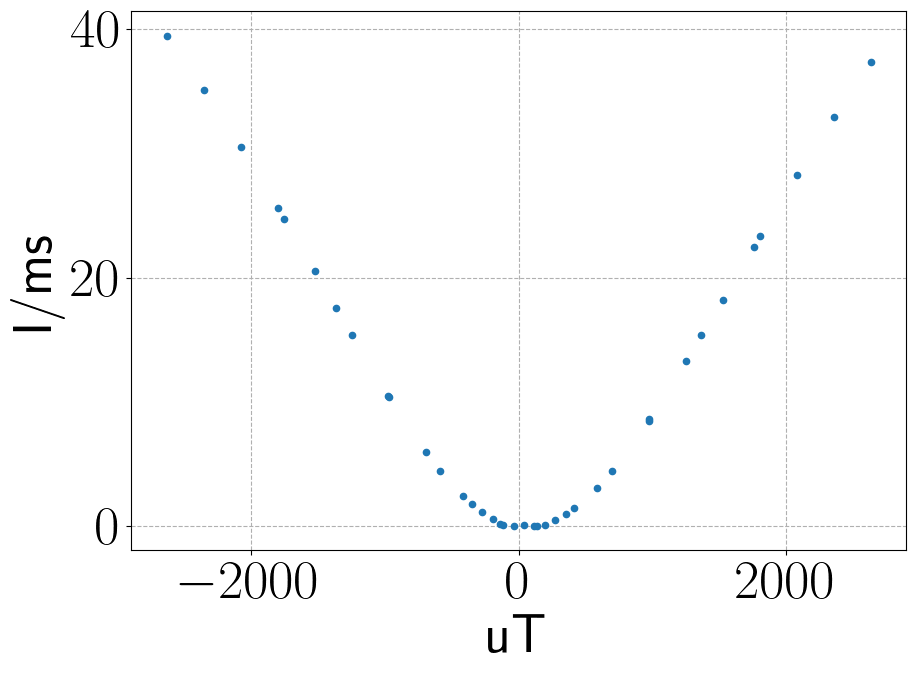

In [8]:
root = Tk()
root.update() 

path = askdirectory(title='Select Folder')
root.destroy()

B, I = main_single(path)

with open(path + "/properties.json", "r") as f:
    properties = json.loads(f.read())

center, radius, ROIsignal, ROIbackground = properties["center"], properties["radius"], properties["ROIsignal"], properties["ROIbackground"]

In [9]:
kernel = None
size = (11, 11)
N = 5

zica = zice["3_zica"]

zica.load_images_multiple_exposures()
zica.get_wire_location()
zica.set_roi(center, radius, ROIsignal, ROIbackground)
zica.apply_rois()
zica.process_images(kernel, size, N)
intensities = zica.get_intensities()
zica.draw_lines()
# zica.show_images()

[['5', '1400us'], ['5', 'loc'], ['5', '2000us'], ['3', '2600us'], ['5', '2600us'], ['0', '1400us'], ['2', '1400us'], ['4', '2600us'], ['4', 'loc'], ['0', 'loc'], ['2', 'loc'], ['1', 'loc'], ['3', '2000us'], ['6', '1400us'], ['1', '1400us'], ['6', 'loc'], ['2', '2000us'], ['6', '2000us'], ['4', '2000us'], ['4', '1400us'], ['0', '2600us'], ['1', '2600us'], ['3', '1400us'], ['6', '2600us'], ['0', '2000us'], ['3', 'loc'], ['2', '2600us'], ['1', '2000us']]


/home/martin/.venv/science/lib/python3.11/site-packages/imageio/plugins/_tifffile.py:8783: UserWarning: unexpected end of LZW stream (code 0)
  warnings.warn("unexpected end of LZW stream (code %i)" % code)
/home/martin/.venv/science/lib/python3.11/site-packages/imageio/plugins/_tifffile.py:8783: UserWarning: unexpected end of LZW stream (code 514)
  warnings.warn("unexpected end of LZW stream (code %i)" % code)


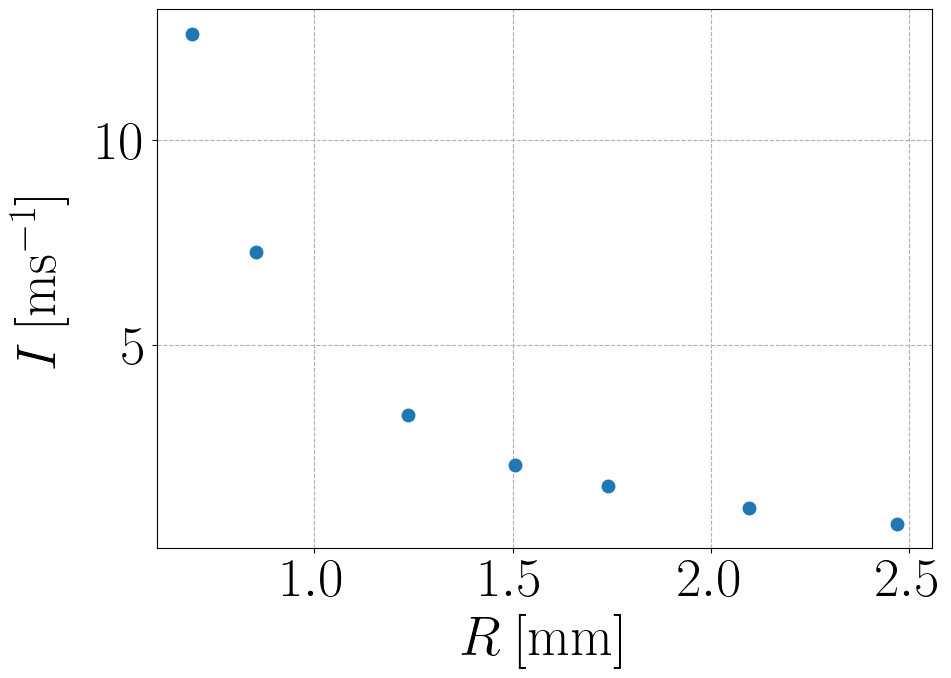

In [10]:
fig, ax = plt.subplots()

# ax.errorbar(intensities[:, 1]*factor_meas, intensities[:, 0], yerr=intensities[:, 2], marker="o", ls="None")
ax.plot(intensities[:, 1]*factor_meas, intensities[:, 0], "o")

ax.set_xlabel(r"$R\>\mathrm{[mm]}$", labelpad=4)
ax.set_ylabel(r"$I\>\mathrm{[ms^{-1}]}$", labelpad=20)

plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38


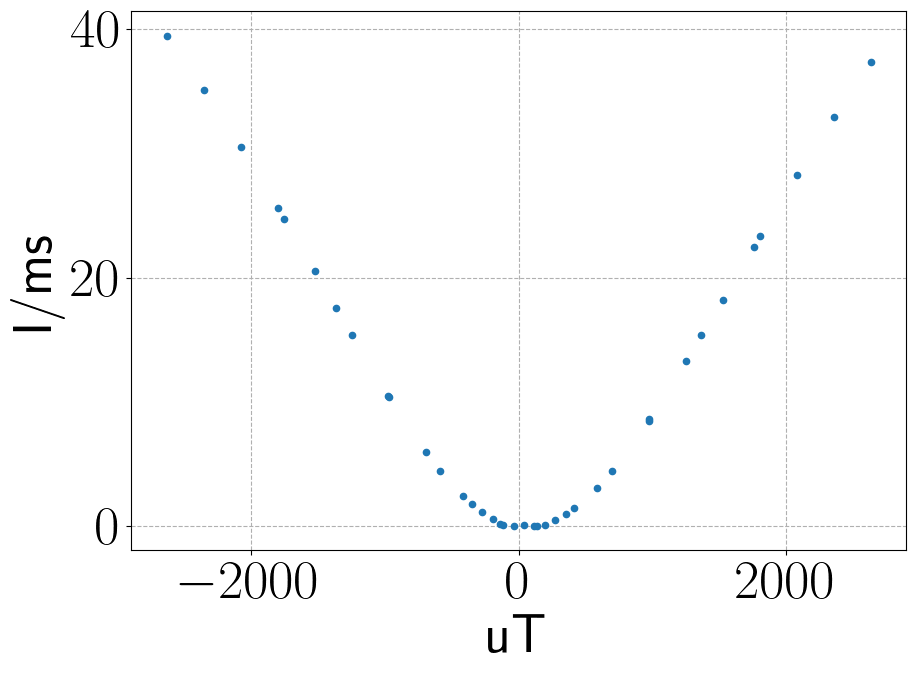

In [11]:
root = Tk()
root.update() 

path = askdirectory(title='Select Folder')
root.destroy()

B2, I2 = main_single(path)

with open(path + "/properties.json", "r") as f:
    properties = json.loads(f.read())

center, radius, ROIsignal, ROIbackground = properties["center"], properties["radius"], properties["ROIsignal"], properties["ROIbackground"]

In [12]:
kernel = None
size = (11, 11)
N = 5

zica = zice["2_zica_2"]

zica.load_images_multiple_exposures()
zica.get_wire_location()
zica.set_roi(center, radius, ROIsignal, ROIbackground)
zica.apply_rois()
zica.process_images(kernel, size, N)
intensities2 = zica.get_intensities()
# zica.draw_lines()
# zica.show_images()

[['5', '1400us'], ['5', 'loc'], ['5', '2000us'], ['3', '2600us'], ['5', '2600us'], ['0', '1400us'], ['2', '1400us'], ['4', '2600us'], ['4', 'loc'], ['0', 'loc'], ['2', 'loc'], ['1', 'loc'], ['3', '2000us'], ['1', '1400us'], ['2', '2000us'], ['4', '2000us'], ['4', '1400us'], ['0', '2600us'], ['1', '2600us'], ['3', '1400us'], ['0', '2000us'], ['3', 'loc'], ['2', '2600us'], ['1', '2000us']]


In [13]:
mask1 = B > 0
mask2 = B2 > 0

Bf1 = scipy.interpolate.interp1d(I[mask1], B[mask1])
Bf2 = scipy.interpolate.interp1d(I2[mask2], B2[mask2])

/tmp/ipykernel_36772/3046352928.py:53: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread("/home/martin/Dropbox/Faks/Delo/Kapljice/Kapljice/slike/geometrija.png")


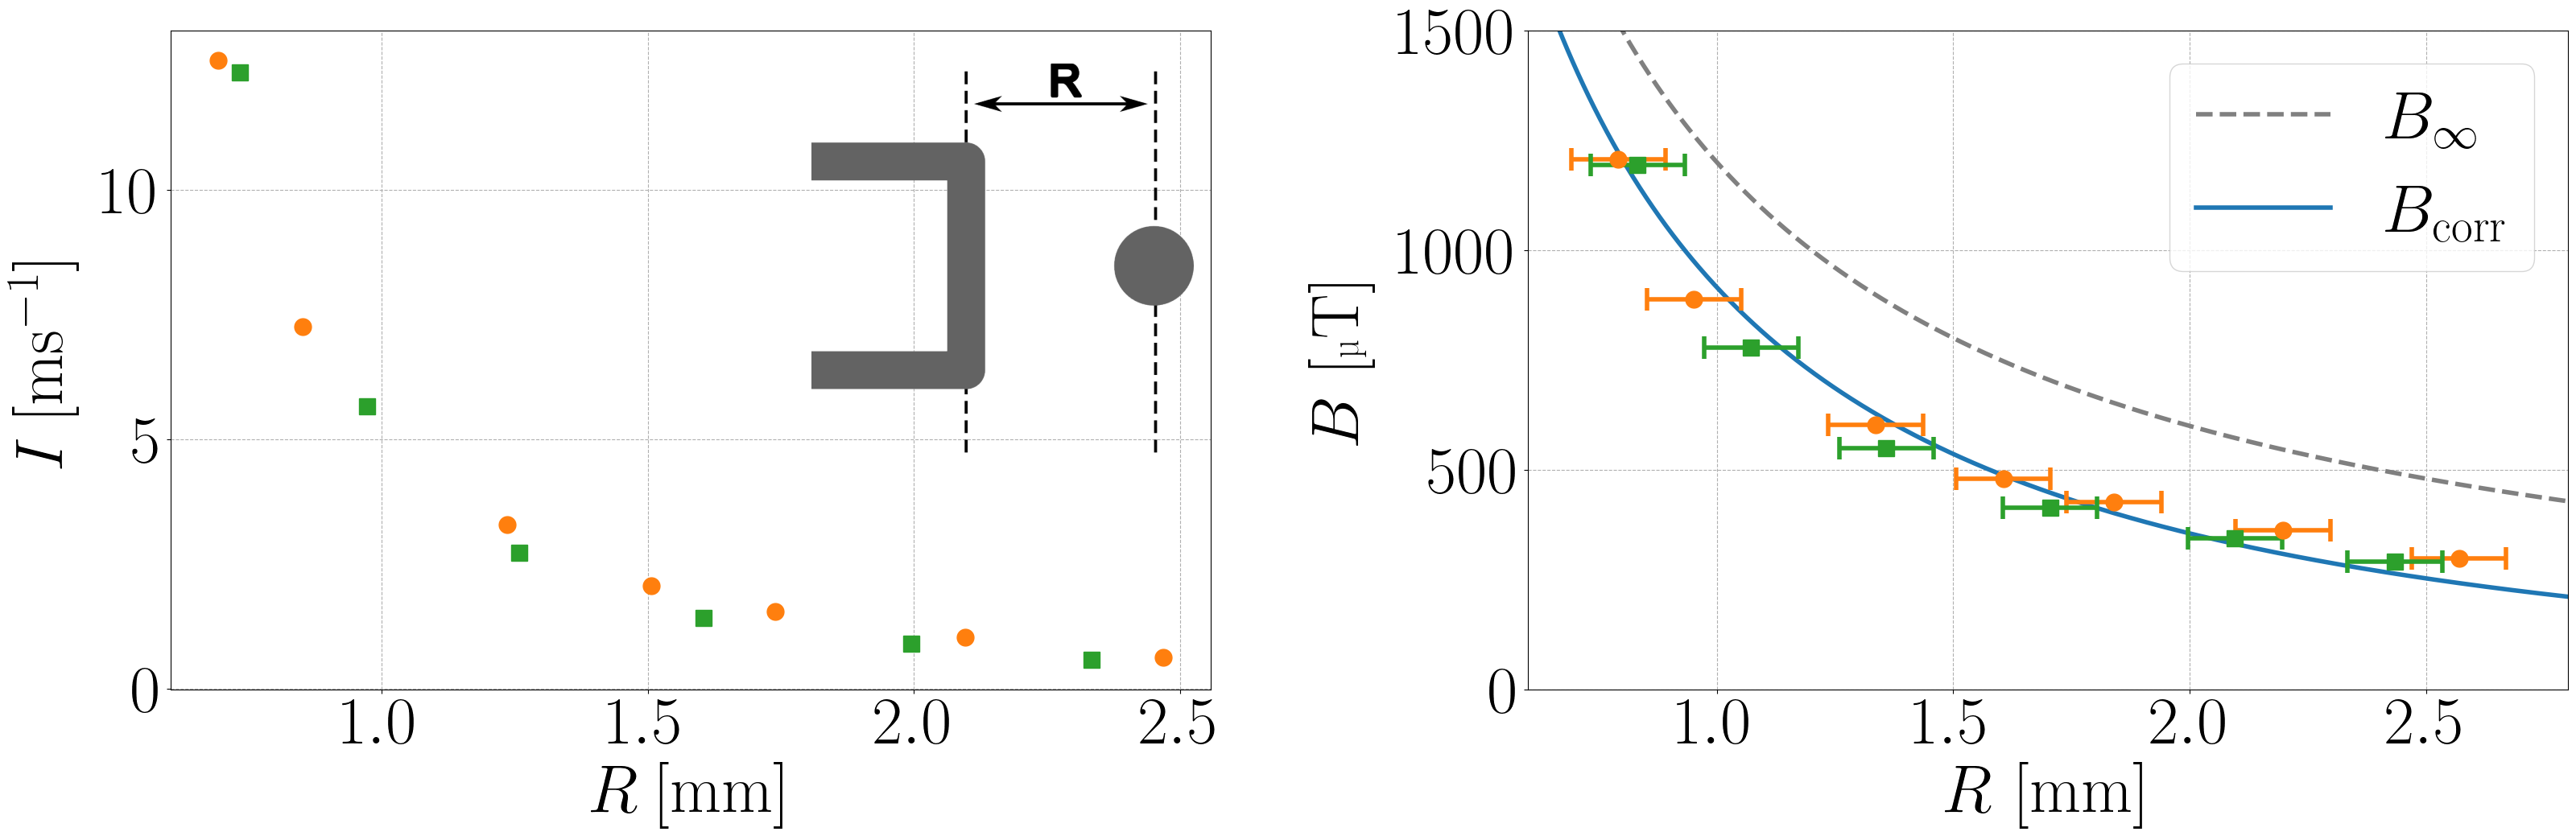

In [72]:
fig, (ax3, ax2) = plt.subplots(figsize=(12*1.4*2, 12), ncols=2, nrows=1)

dR = -0.1

# ax1.plot(B2, I2, ".")
# ax1.set_xlabel(r"$B$ $\mathrm{[}$\SI{}{\micro\tesla}$\mathrm{]}$")
# ax1.set_ylabel(r"$I$ $\mathrm{[ms^{-1}]}$", labelpad=20)

# x1, x2, y1, y2 = -500, 500, -0.2, 3
# axins = ax1.inset_axes([0.27, 0.5, 0.46, 0.47],
#                     #    [-500, -2, 1000, 12],
#                        xlim=(x1, x2), ylim=(y1, y2), 
#                        xticklabels=[], yticklabels=[]) 
# axins.plot(B2, I2, ".")
# ax1.indicate_inset_zoom(axins, edgecolor="black")

R = np.linspace(np.amin(intensities[:, 1]*factor_meas) - 0.5, np.amax(intensities[:, 1]*factor_meas) + 0.5, 1000) - dR

ax2.plot(R, B_anal(6, R*1e-3)*1e6, "--", color="gray", label="$B_\infty$")
ax2.plot(R, B_corr(6, R*1e-3, d=7.3e-3)*1e6, "-", color="tab:blue", label="$B_\mathrm{corr}$")
# ax.plot(R, B_corr(6, R*1e-3, d=6.5e-3)*1e6, "--", color="gray")#, label="$\mathrm{Theory}$")
ax2.errorbar(intensities[:, 1]*factor_meas - dR, Bf1(intensities[:, 0]), xerr=0.1, marker="o", ls="None", capthick=4, elinewidth=4, color="tab:orange")
ax2.errorbar(intensities2[:, 1]*factor_meas - dR, Bf2(intensities2[:, 0]), xerr=0.1, marker="s", ls="None", capthick=4, elinewidth=4, color="tab:green")
# ax.plot(intensities[:, 1]*factor_meas, fields2, "o")

# ax.plot(intensities[:, 1]*factor_meas, fields, "o")

ax2.set_xlabel(r"$R$ $\mathrm{[}$\SI{}{mm}$\mathrm{]}$", labelpad=4)
ax2.set_ylabel(r"$B$ $\mathrm{[}$\SI{}{\micro\tesla}$\mathrm{]}$", labelpad=20)

ax2.set_xlim((0.6, 2.8))

ax2.legend(loc="upper right")

ax2.set_ylim((0, 1500))

axins = ax3.inset_axes([0.50, 0.35, 0.60, 0.60]) 

axins.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,      # ticks along the bottom edge are off
    right=False,
    labelbottom=False,      # ticks along the bottom edge are off
    labeltop=False,         # ticks along the top edge are off
    labelleft=False,      # ticks along the bottom edge are off
    labelright=False,) # labels along the bottom edge are off
axins.grid(False)
axins.axis("off")

img = imageio.imread("/home/martin/Dropbox/Faks/Delo/Kapljice/Kapljice/slike/geometrija.png")
axins.imshow(img)

# newax = fig.add_axes([0.35, 0.35, 0.65-0.02/1.4, 0.63], anchor='NE', zorder=1)

# newax.grid(False)
# newax.axis(False)

ax3.plot(intensities[:, 1]*factor_meas, intensities[:, 0], "o", color="tab:orange")
ax3.plot(intensities2[:, 1]*factor_meas, intensities2[:, 0], "s", color="tab:green")

ax3.set_xlabel(r"$R\>\mathrm{[mm]}$", labelpad=4)
ax3.set_ylabel(r"$I\>\mathrm{[ms^{-1}]}$", labelpad=20)

plt.tight_layout()

plt.savefig("/home/martin/Dropbox/Faks/Delo/Kapljice/Kapljice/slike/graf.pdf", dpi=300)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


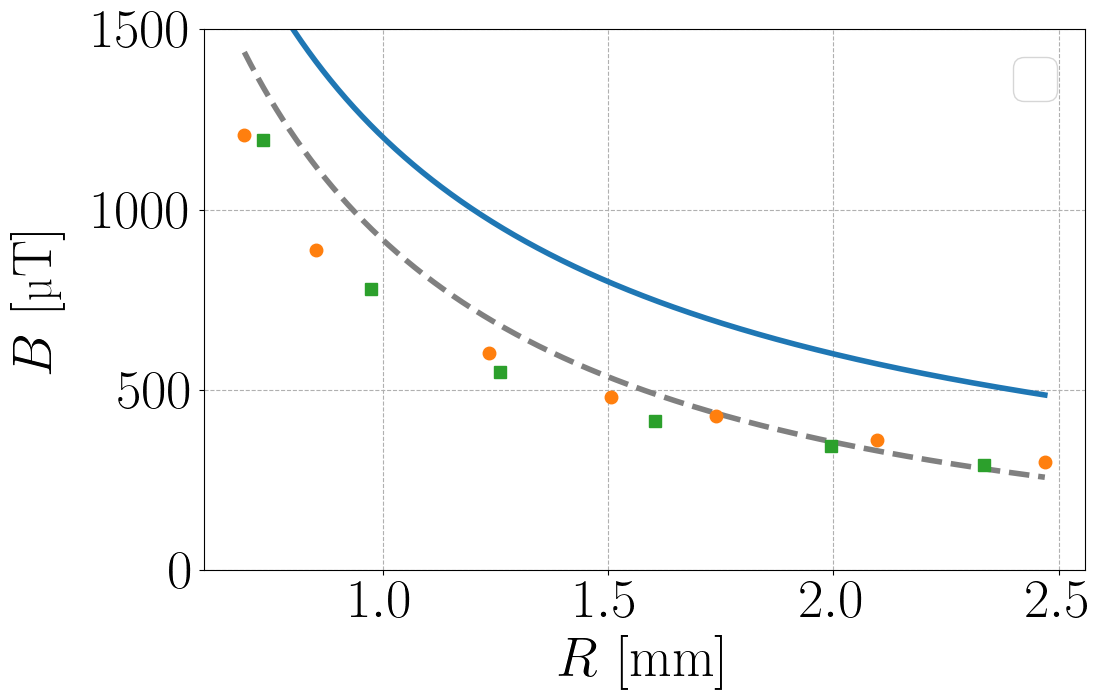

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
R = np.linspace(np.amin(intensities[:, 1]*factor_meas), np.amax(intensities[:, 1]*factor_meas), 1000)

ax.plot(R, B_anal(6, R*1e-3)*1e6, "-")
ax.plot(R, B_corr(6, R*1e-3, d=7.3e-3)*1e6, "--", color="gray")#, label="$\mathrm{Theory}$")
# ax.plot(R, B_corr(6, R*1e-3, d=6.5e-3)*1e6, "--", color="gray")#, label="$\mathrm{Theory}$")
ax.plot(intensities[:, 1]*factor_meas, Bf1(intensities[:, 0]), "o")#, label="$\mathrm{Meritev\>1}$")
ax.plot(intensities2[:, 1]*factor_meas, Bf2(intensities2[:, 0]), "s")#, label="$\mathrm{Meritev\>2}$")
# ax.plot(intensities[:, 1]*factor_meas, fields2, "o")

# ax.plot(intensities[:, 1]*factor_meas, fields, "o")

ax.set_xlabel(r"$R$ $\mathrm{[}$\SI{}{mm}$\mathrm{]}$", labelpad=4)
ax.set_ylabel(r"$B$ $\mathrm{[}$\SI{}{\micro\tesla}$\mathrm{]}$", labelpad=20)

ax.legend(loc="upper right")

ax.set_ylim((0, 1500))

plt.tight_layout()

plt.show()